In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale 

from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [88]:
df = pd.read_csv('C:\\Users\\sanuj\\OneDrive\\Desktop\\4th Year\\ST 4052 Statitics Learning\\Final Project\\Loan.csv')
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,Credit Card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [89]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
Credit Card           0
dtype: int64

In [90]:
df.duplicated().sum()

0

In [91]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
Credit Card             int64
dtype: object

In [92]:
# Create dummy variables
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'Credit Card'],
      dtype='object')

In [93]:
dummy_col = ['Securities Account',
       'CD Account', 'Online', 'Credit Card']
df2 =pd.get_dummies(data = df, columns = dummy_col)

In [94]:
df2.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,Credit Card_0,Credit Card_1
0,1,25,1,49,91107,4,1.6,1,0,0,0,1,1,0,1,0,1,0
1,2,45,19,34,90089,3,1.5,1,0,0,0,1,1,0,1,0,1,0
2,3,39,15,11,94720,1,1.0,1,0,0,1,0,1,0,1,0,1,0
3,4,35,9,100,94112,1,2.7,2,0,0,1,0,1,0,1,0,1,0
4,5,35,8,45,91330,4,1.0,2,0,0,1,0,1,0,1,0,0,1


In [95]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [96]:
#label encoding for ordinal variable
label_encoder = LabelEncoder()
df2['Education_encoded'] = label_encoder.fit_transform(df2['Education'])
df2 = df2.drop('Education', axis = 1)
df2.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal Loan,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,Credit Card_0,Credit Card_1,Education_encoded
0,1,25,1,49,91107,4,1.6,0,0,0,1,1,0,1,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,0,1,1,0,1,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,1,0,1,0,1,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,1,0,1,0,1,0,1,0,1
4,5,35,8,45,91330,4,1.0,0,0,1,0,1,0,1,0,0,1,1


In [97]:
#Convert Negative Values in Experience into Positive
df['Experience']=df['Experience'].apply(lambda x :abs(x))

In [98]:
#After analyzing for outliers, these 2 observations are deleted (In Income Var)
df.drop(labels=[3896, 4993],axis=0,inplace=True)

In [99]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,Credit Card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [100]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,Credit Card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4998 non-null   int64  
 1   Age                 4998 non-null   int64  
 2   Experience          4998 non-null   int64  
 3   Income              4998 non-null   int64  
 4   ZIPCode             4998 non-null   int64  
 5   Family              4998 non-null   int64  
 6   CCAvg               4998 non-null   float64
 7   Education           4998 non-null   int64  
 8   Mortgage            4998 non-null   int64  
 9   Personal Loan       4998 non-null   int64  
 10  Securities Account  4998 non-null   int64  
 11  CD Account          4998 non-null   int64  
 12  Online              4998 non-null   int64  
 13  Credit Card         4998 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.7 KB


In [102]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4998.0,2499.721689,1443.242482,1.0,1250.25,2499.5,3748.75,5000.0
Age,4998.0,45.337935,11.465397,23.0,35.00,45.0,55.00,67.0
Experience,4998.0,20.133653,11.417336,0.0,10.00,20.0,30.00,43.0
Income,4998.0,73.715286,45.948557,8.0,39.00,64.0,98.00,205.0
ZIPCode,4998.0,93152.615846,2122.161418,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4998.0,2.396559,1.147865,1.0,1.00,2.0,3.00,4.0
CCAvg,4998.0,1.936044,1.745442,0.0,0.70,1.5,2.50,10.0
Education,4998.0,1.881353,0.839852,1.0,1.00,2.0,3.00,3.0
Mortgage,4998.0,56.521409,101.727873,0.0,0.00,0.0,101.00,635.0
Personal Loan,4998.0,0.096038,0.294673,0.0,0.00,0.0,0.00,1.0


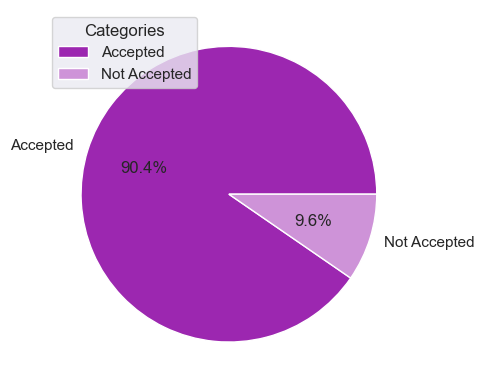

0    4520
1     480
Name: Personal Loan, dtype: int64

In [103]:
counts = df2['Personal Loan'].value_counts()

sns.set(style="darkgrid")
custom_colors = ["#9c27b0","#ce93d8"]
plt.pie(counts, labels=['Accepted','Not Accepted'], colors=custom_colors, autopct='%1.1f%%')
plt.legend(title='Categories', labels=['Accepted','Not Accepted'])
plt.show()


df2['Personal Loan'].value_counts()

In [104]:
num_var = ['Age', 'Experience', 'Income', 'CCAvg','Mortgage']

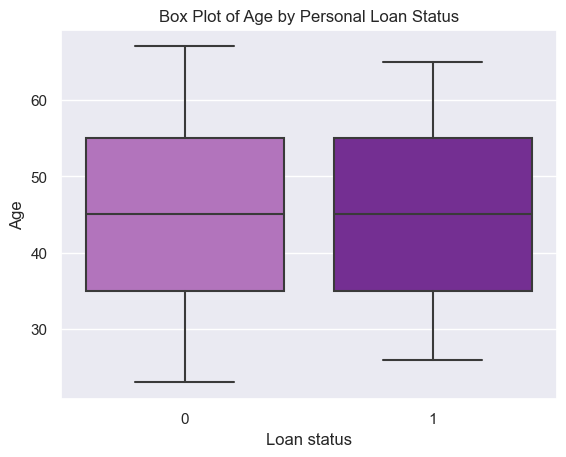

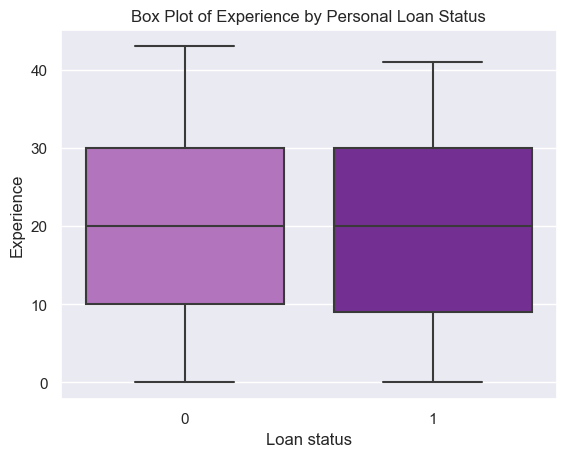

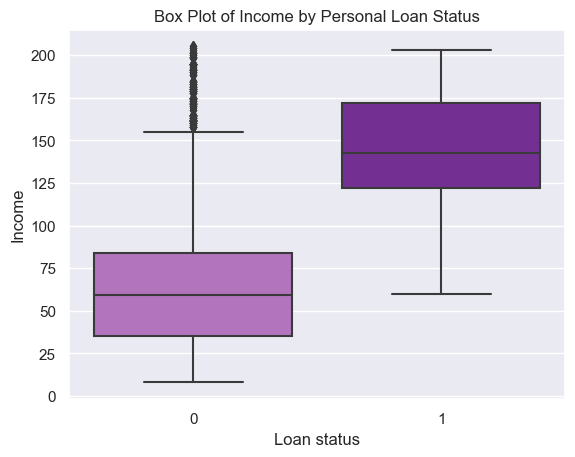

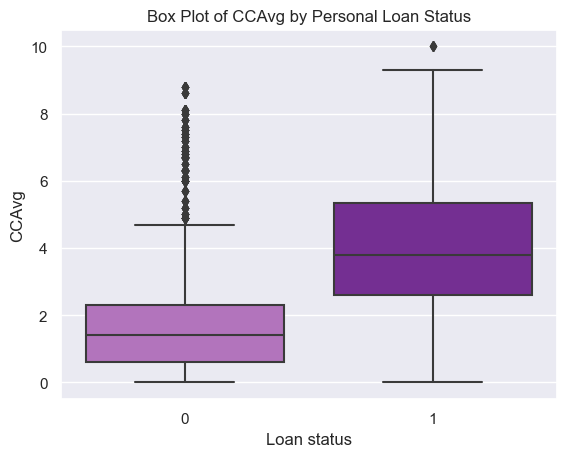

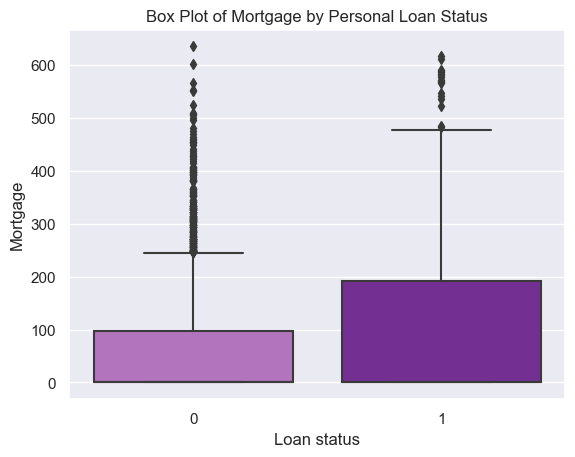

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette
colors = ['#ba68c8', '#7b1fa2']
sns.set_palette(sns.color_palette(colors))

# Add dark grid
sns.set(style="darkgrid")

# Loop through numerical variables
for i in num_var:
    # Create a box plot
    sns.boxplot(data=df, x='Personal Loan', y=i,palette=colors)

    # Add labels and title
    plt.xlabel('Loan status')
    plt.ylabel(i)
    plt.title(f'Box Plot of {i} by Personal Loan Status')

    # Show the plot
    plt.show()


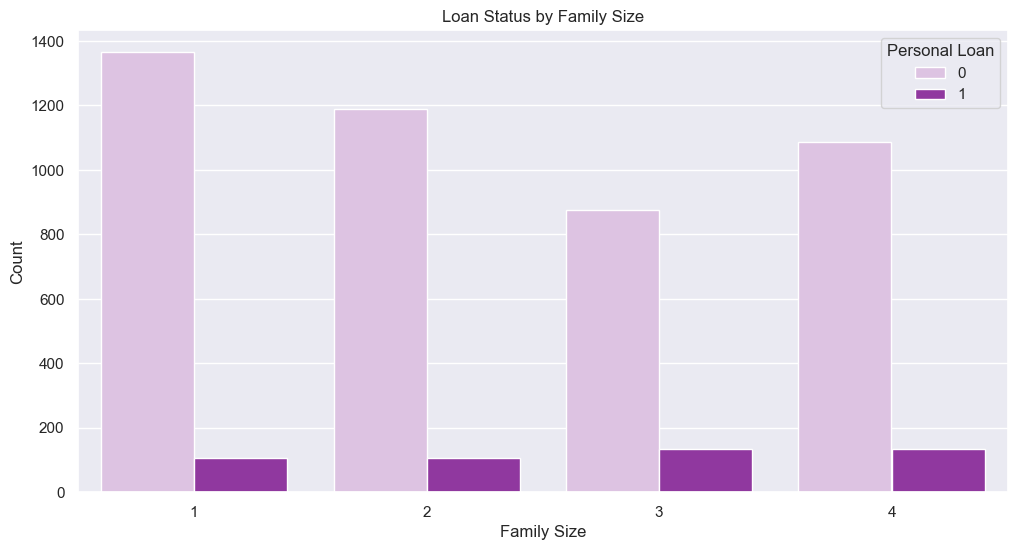

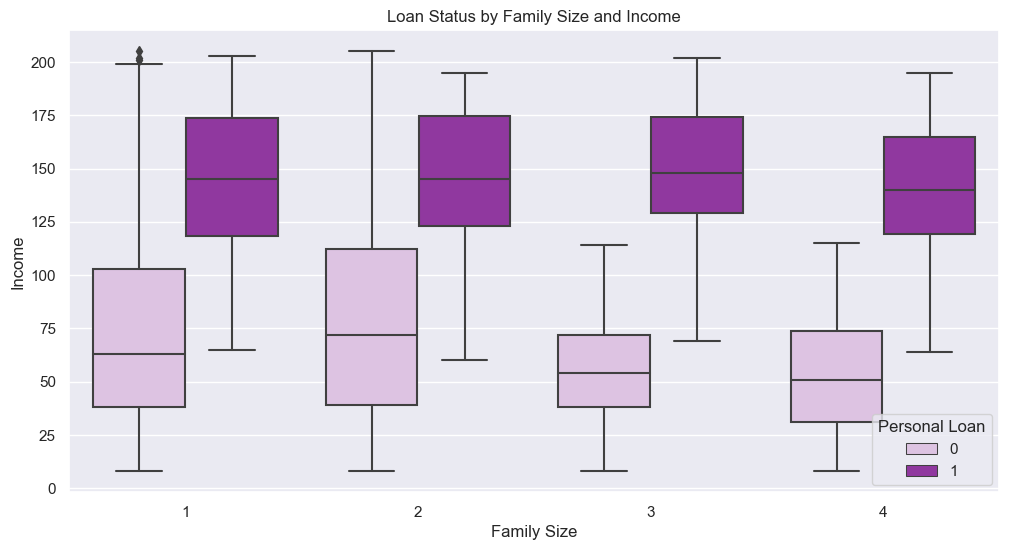

In [106]:
colors = ['#e1bee7', '#9c27b0','#ba68c8','#6a1b9a']
sns.set_palette(sns.color_palette(colors))

sns.set(style="darkgrid")


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Family', hue='Personal Loan',palette=colors)

# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Loan Status by Family Size')

# Show the plot
plt.show()

# Create a bar plot for family income
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Family', y='Income', hue='Personal Loan',palette=colors)


# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Income')
plt.title('Loan Status by Family Size and Income')

# Show the plot
plt.show()


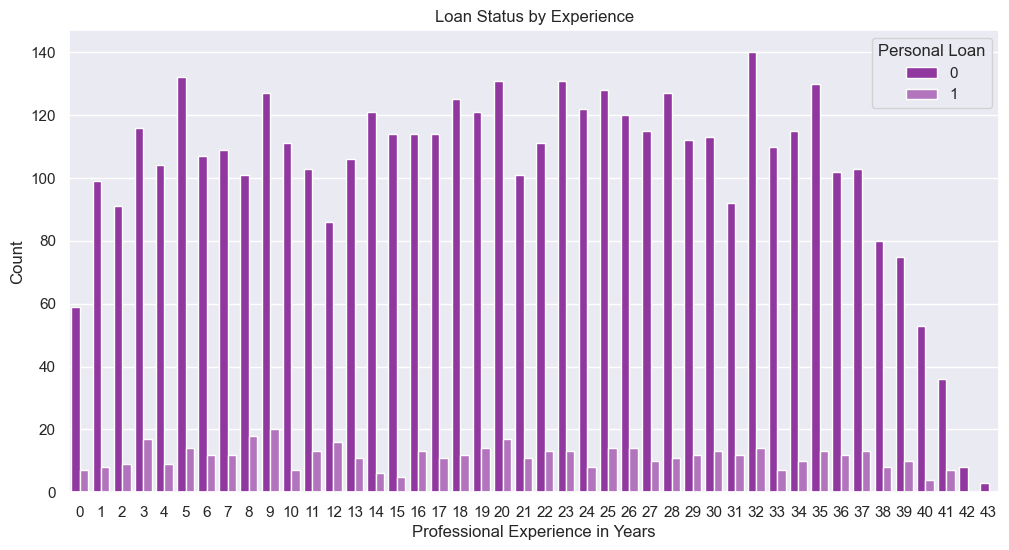

In [107]:
colors = [ '#9c27b0','#ba68c8','#6a1b9a']
sns.set_palette(sns.color_palette(colors))

sns.set(style="darkgrid")


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Experience', hue='Personal Loan',palette=colors)

# Add labels and title
plt.xlabel('Professional Experience in Years')
plt.ylabel('Count')
plt.title('Loan Status by Experience')

# Show the plot
plt.show()

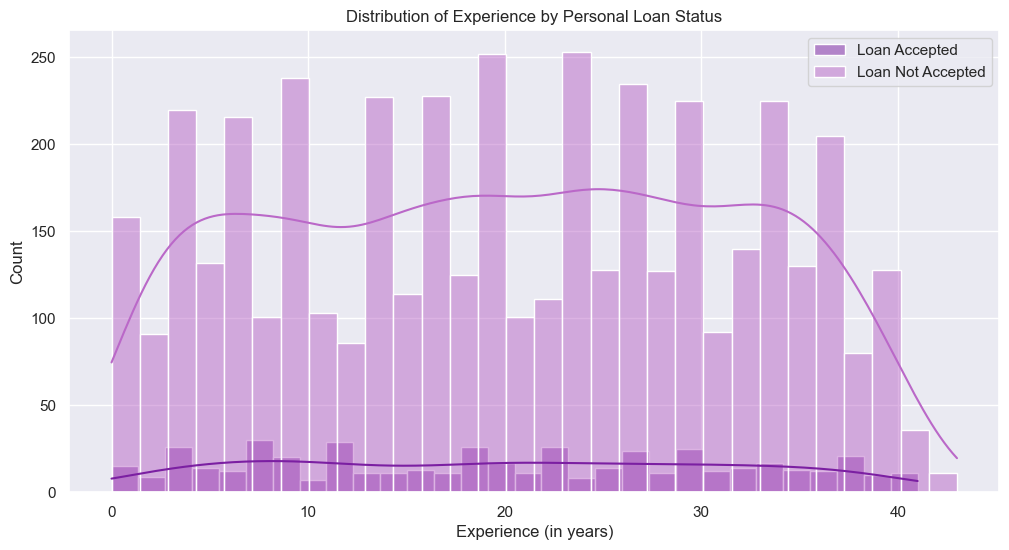

In [108]:

loan_accepted = df[df['Personal Loan'] == 1]
loan_not_accepted = df[df['Personal Loan'] == 0]

plt.figure(figsize=(12, 6))

sns.histplot(loan_accepted['Experience'], kde=True, color='#7b1fa2', label='Loan Accepted', bins=30)
sns.histplot(loan_not_accepted['Experience'], kde=True, color='#ba68c8', label='Loan Not Accepted', bins=30)

plt.xlabel('Experience (in years)')
plt.ylabel('Count')
plt.title('Distribution of Experience by Personal Loan Status')

plt.legend()

plt.show()

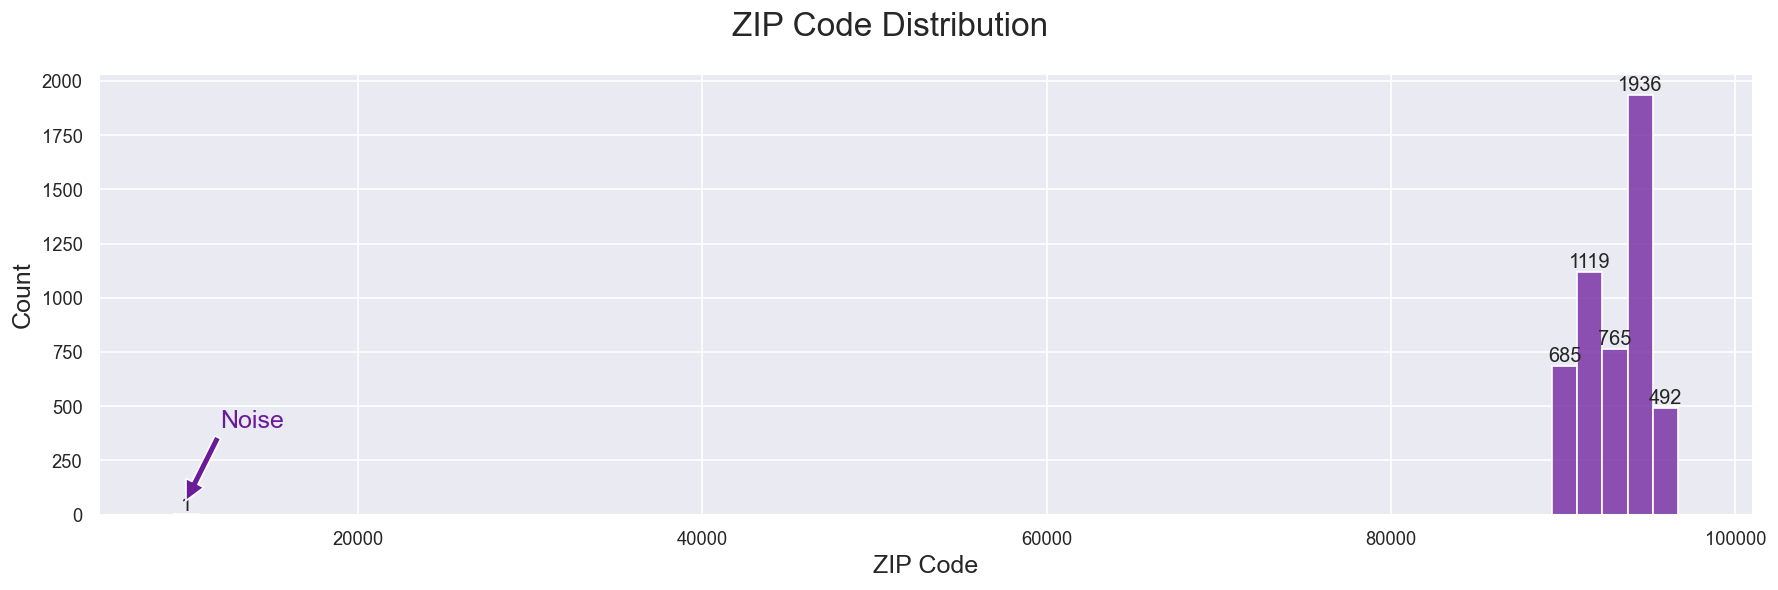

In [109]:
# Set the style of the graph
sns.set_style('darkgrid')
color = '#6a1b9a'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='ZIPCode', data=df, bins=60, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15, 
             arrowprops=dict(facecolor=color, shrink=0.01))
plt.xlabel('ZIP Code', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('ZIP Code Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [110]:
df.drop(df[df['ZIPCode']<20000].index, inplace=True)
df.reset_index(drop=True, inplace =True)

In [111]:
mortgage_descriptives = df['Mortgage'].describe()

# Display the descriptive statistics
print(mortgage_descriptives)

count    4997.00000
mean       56.53272
std       101.73491
min         0.00000
25%         0.00000
50%         0.00000
75%       101.00000
max       635.00000
Name: Mortgage, dtype: float64


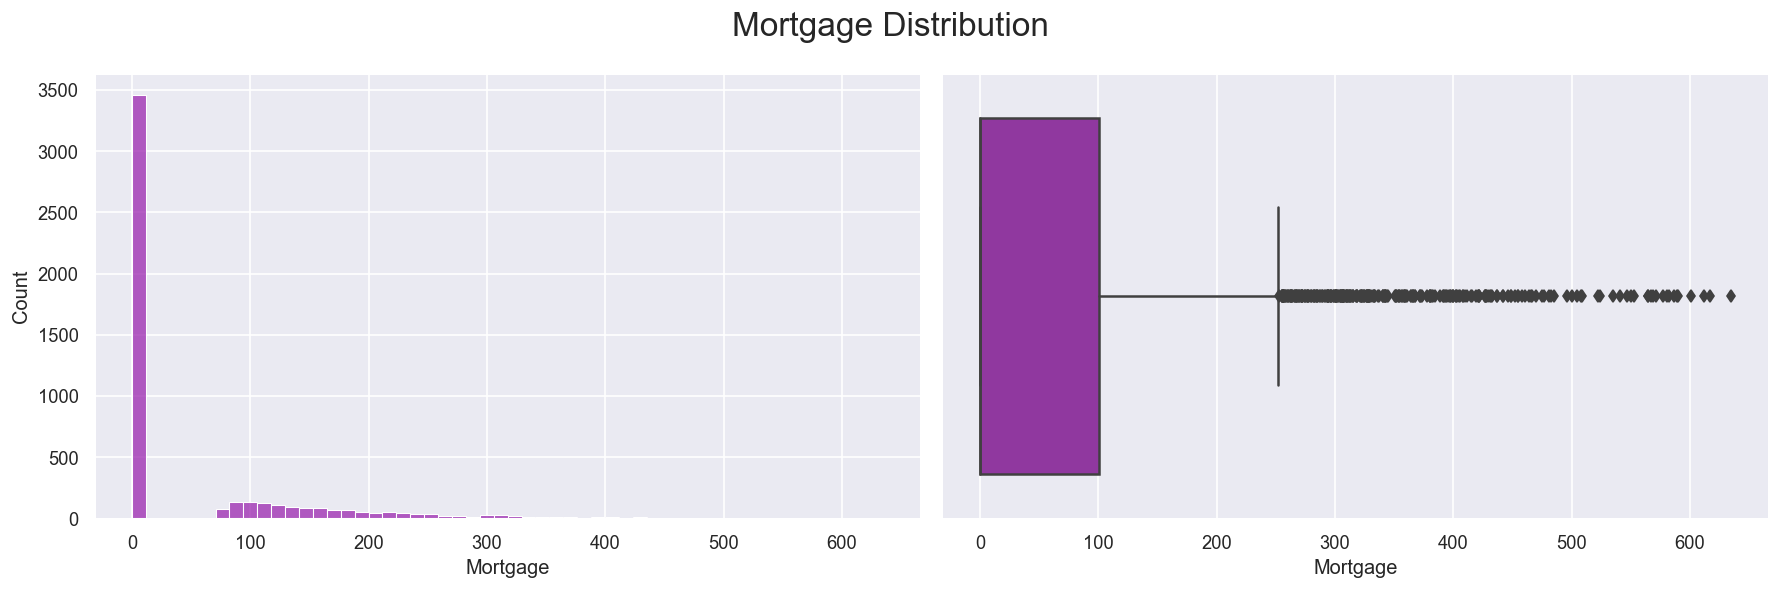

In [112]:
#Outlier Analysis
sns.set(rc = {'axes.labelsize' : 15})               
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='Mortgage', data=df, color='#9c27b0', ax=ax[0])
sns.boxplot(x='Mortgage', data=df, color='#9c27b0', ax=ax[1])
plt.suptitle('Mortgage Distribution', fontsize=20)
plt.tight_layout()
plt.show()

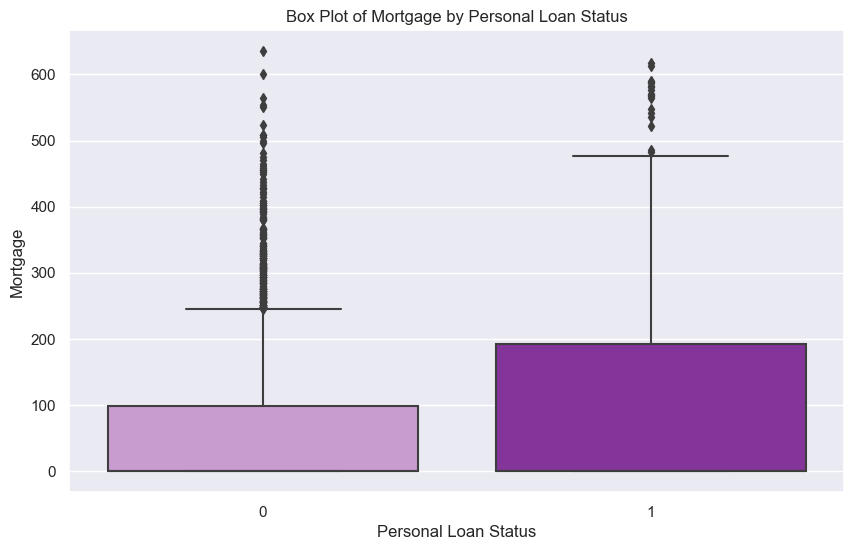

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette
colors = ['#ce93d8', '#8e24aa']
sns.set_palette(sns.color_palette(colors))

# Add dark grid
sns.set(style="darkgrid")

# Create a box plot for 'Mortgage' by 'Personal Loan' status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Personal Loan', y='Mortgage',palette= colors)

# Add labels and title
plt.xlabel('Personal Loan Status')
plt.ylabel('Mortgage')
plt.title('Box Plot of Mortgage by Personal Loan Status')

# Show the plot
plt.show()
